# Diabetes

### Attribute Information 

<!-- 1.Pregnancies
2.Glucose
3.BloodPressure
4.SkinThickness
5.Insulin
6.BMI
7.DiabetesPedigreeFunction
8.Age
9.Outcome -->

#### 1. Pregnancies : Number of times pregnant
#### 2. Glucose : plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### 3. BloodPressure : Ciastolic blood pressure (mm Hg)
#### 4. SkinThickness : Triceps skin fold thickness (mm)
#### 5. Insulin : 2-Hour serum insulin (mu U/ml)
#### 6. BMI : Body mass index (Weight in kg/(height in m)^2)
#### 7. DiabetesPedigreeFunction : Diabetes pedigree function
#### 8. Age : Years
#### 9. Outcome : 0 is No , 1 is Yes

## Objective

#### For the given characteristic values, the model must recognize whether the person in question has diabetes or not

In [2]:
# import librery for calculat satatic
import numpy as np

# import library for read data
import pandas as pd

# import library for display plot
import matplotlib.pyplot as plt
import seaborn as sns

# import library for processng data and machin learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## data analysis 

### 1.Checking the data balance in the database

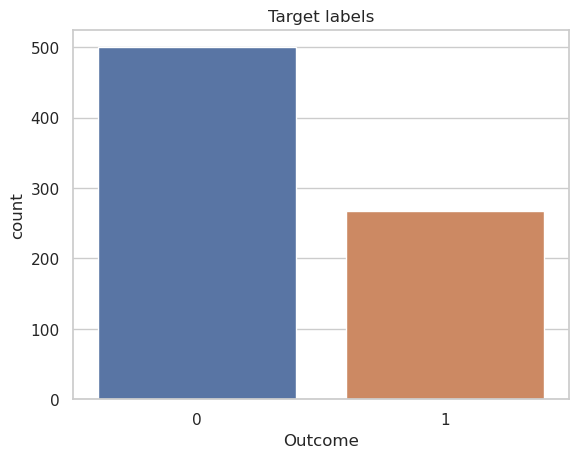

In [4]:
sns.set(style="whitegrid")
sns.countplot(x=data.Outcome)
plt.title("Target labels")
plt.show()

#### Examining the balance of data in the data set, the number of data that reflects the presence of diabetes in the patient is less than the data that indicates its absence. 

### 2.Check for outliers or zero values

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

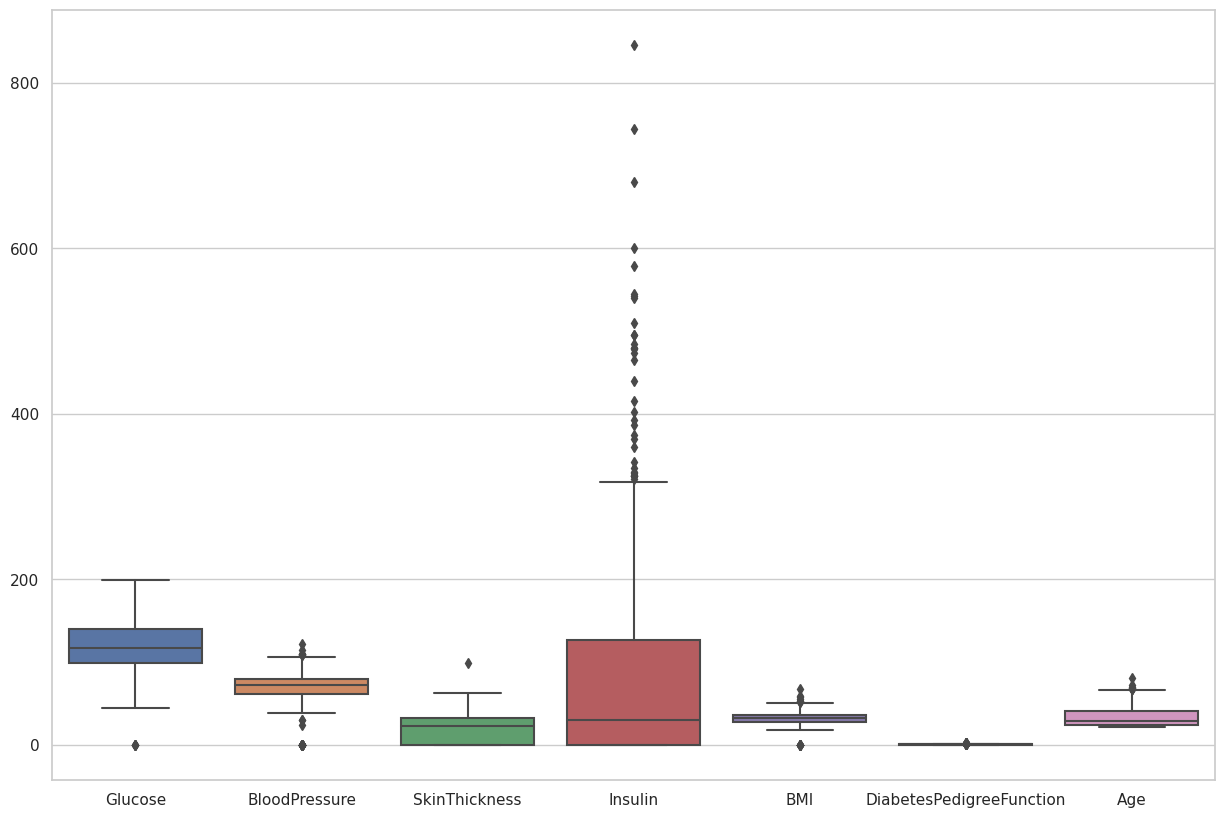

In [6]:
# coxplot for detect outliyre data
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[['Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

<AxesSubplot:>

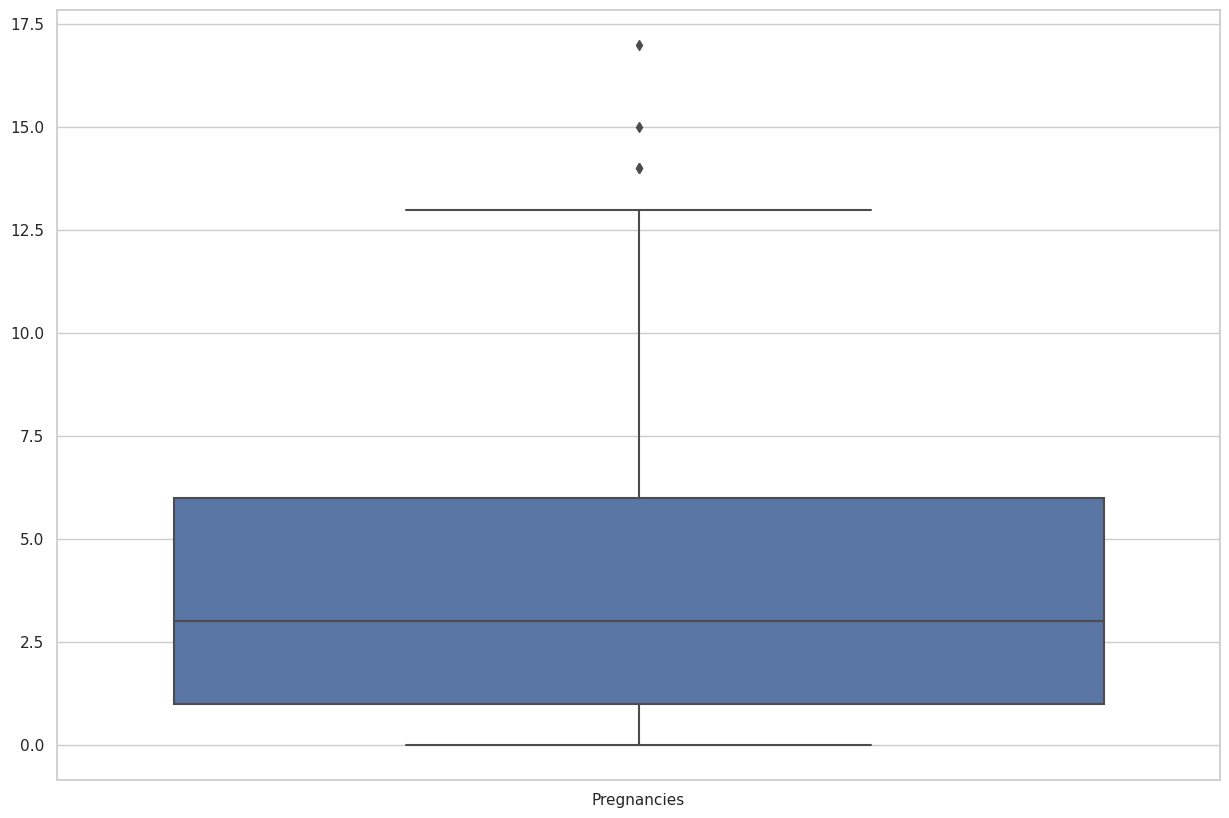

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[['Pregnancies']])

## Take a look at some important features

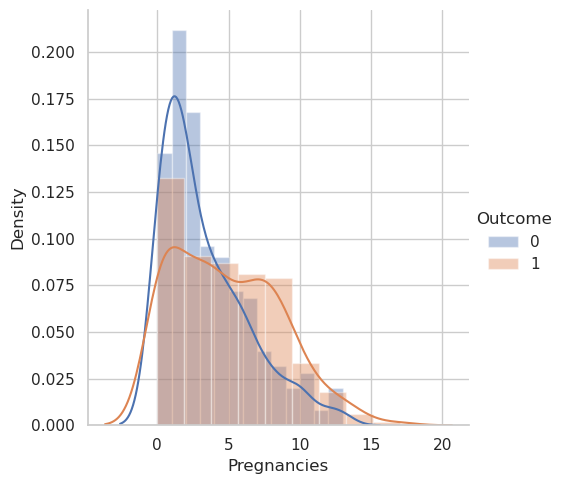

In [8]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "Pregnancies") \
   .add_legend();
plt.show();

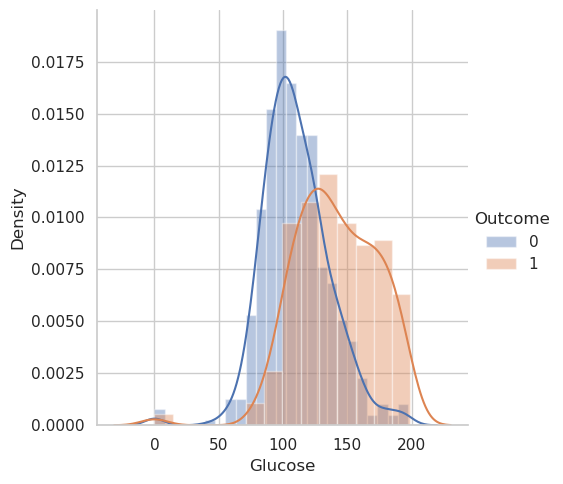

In [9]:
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "Glucose") \
   .add_legend();
plt.show();

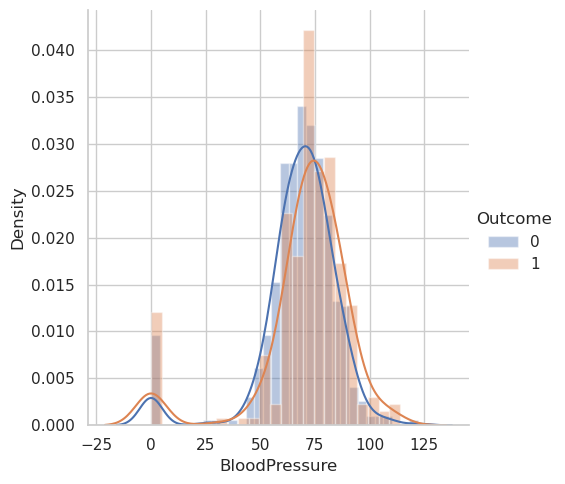

In [10]:
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "BloodPressure") \
   .add_legend();
plt.show();

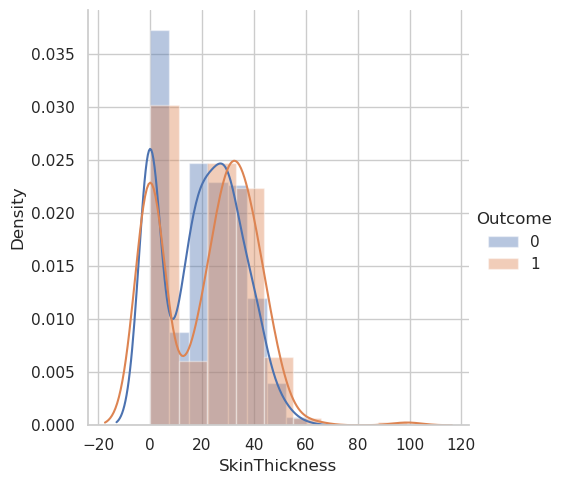

In [11]:
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "SkinThickness") \
   .add_legend();
plt.show();

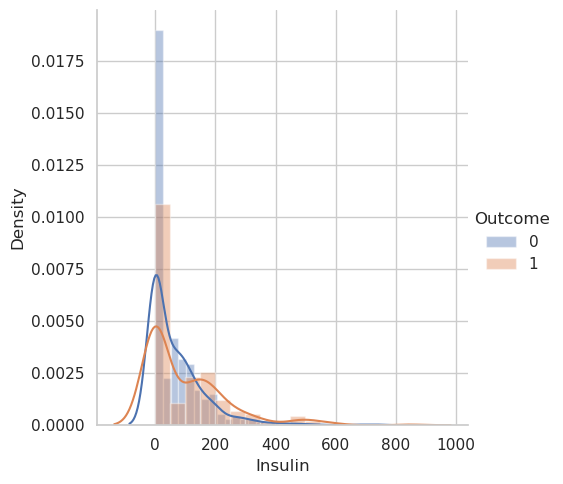

In [12]:
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "Insulin") \
   .add_legend();
plt.show();

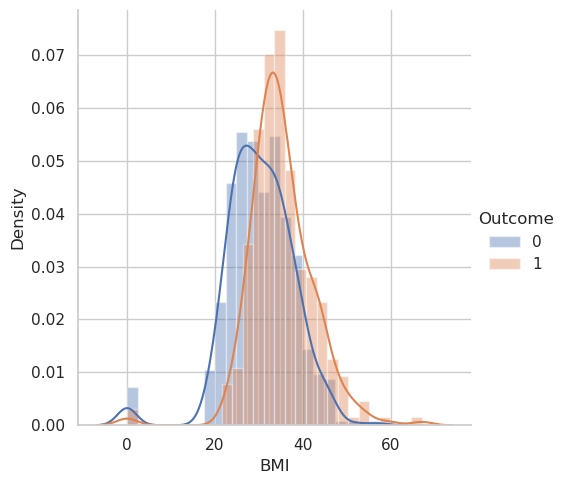

In [13]:
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "BMI") \
   .add_legend();
plt.show();

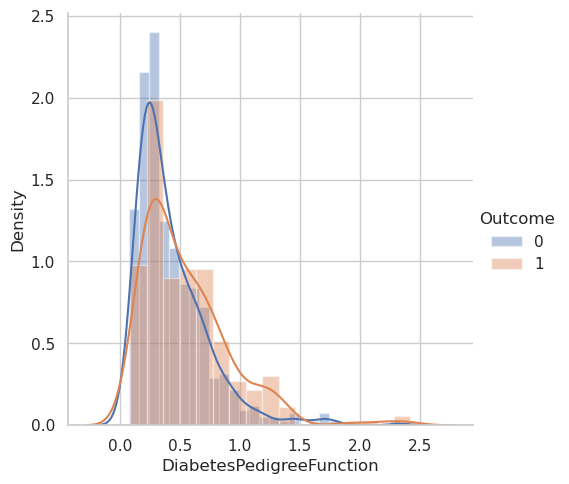

In [14]:
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "DiabetesPedigreeFunction") \
   .add_legend();
plt.show();

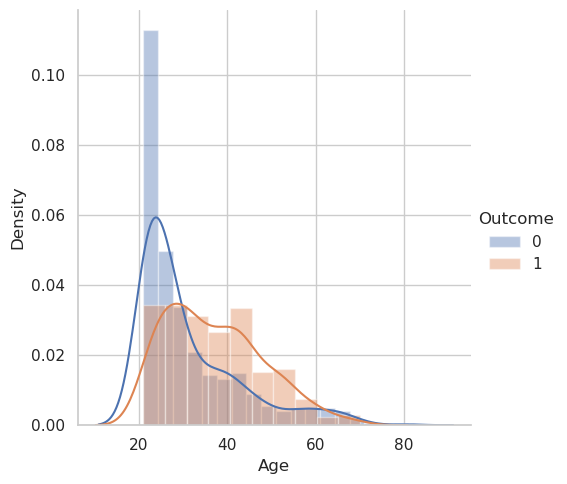

In [15]:
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

In [16]:
Y = data.Outcome
x = data.drop(columns=['Outcome'])

In [17]:
cloumns_name = data.columns.tolist()

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x, Y , test_size=.2, random_state=0)

In [19]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [20]:
def PlotErrores(k, train, cv):
    plt.plot(k, train, label='Trian Error')
    plt.plot(k, cv, label='cv Error')
    plt.title('Errors plot for Train and validation data')
    plt.xlabel("Error(C)= Error(Trian)")
    plt.ylabel("Error")
    plt.legend()
    plt.grid()
    plt.show

In [21]:
def evaluate_this_model(clf):
    print("Your model parameters are as below:\n")
    print(clf)
    print("-------------------------------------------------------------------------------")
    print("\nTest and train results for this model:")
    
    train_mse = metrics.mean_squared_error(y_train, clf.predict_proba(x_train)[:,1])
    test_mse  =metrics.mean_squared_error(y_test, clf.predict_proba(x_test)[:,1])
    print("\ntrain_mse on train data is :{}".format(train_mse))
    print("test_mse on test data is :{}\n ".format(test_mse))
    
    print("-------------------------------------------------------------------------------")
    print("Weight vector for this model is :\n\n{}".format(clf.coef_[0]))
    print("-------------------------------------------------------------------------------")
    print("\nFeatures and its corresponding weights\n")
    feature_weights=sorted(zip(clf.coef_[0],cloumns_name),reverse = True)
    [print(i) for i in feature_weights]

In [22]:
clf = LogisticRegression()
clf

LogisticRegression()

## C:

#### A high value of C tells the model to give more weight to the training data. A lower value of C will indicate the model to give complexity more weight at the cost of fitting the data. Thus, a high Hyper Parameter value C indicates that training data is more important and reflects the real world data, whereas low value is just the opposite of this.

In [23]:
# case 1:
# 'λ' = 0.001 checking with small value
Lambda = 0.001
clf = LogisticRegression(C=1/Lambda ) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=1000.0)
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.15795718517366034
test_mse on test data is :0.13538299195138653
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.31466197  1.07875511 -0.26845905  0.07102953 -0.1664169   0.69550379
  0.29832364  0.23941786]
-------------------------------------------------------------------------------

Features and its corresponding weights

(1.0787551051197584, 'Glucose')
(0.6955037856912938, 'BMI')
(0.31466197370050836, 'Pregnancies')
(0.298323641250295, 'DiabetesPedigreeFunction')
(0.2394178585641692, 'Age')
(0.07102953402867122, 'SkinThickness')
(-0.16641690140266358, 'Insulin')
(-0.2684590491252512, 'BloodPressure')


In [24]:
# case 2 :
Lambda = 100000
clf = LogisticRegression(C=1/Lambda) #instantiating LR into "clf" with lambda = 9000 (large value)
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=1e-05)
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.23008941421526483
test_mse on test data is :0.21474391705619186
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[0.00057021 0.00135064 0.0001686  0.00025892 0.00035175 0.00089334
 0.00048009 0.00070236]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.0013506443598291231, 'Glucose')
(0.0008933382356195108, 'BMI')
(0.000702357500979282, 'Age')
(0.0005702063440126121, 'Pregnancies')
(0.00048009433082739307, 'DiabetesPedigreeFunction')
(0.0003517462065999939, 'Insulin')
(0.00025892313903015673, 'SkinThickness')
(0.00016859594031201755, 'BloodPressure')


In [37]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,intercept_scaling=0,fit_intercept=False) 
clf.fit(x_train, y_train)
# evaluate_this_model(clf)

print("Intercept value is: {} ".format(clf.intercept_))
print("\nAnd weights vaector is : ")
(clf.coef_[0])

Intercept value is: [0.] 

And weights vaector is : 


array([ 0.15986499,  0.48306596, -0.0588043 ,  0.03656091,  0.01725925,
        0.30095084,  0.14990233,  0.17385045])

In [26]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,intercept_scaling=1,fit_intercept=True) 
clf.fit(x_train, y_train)
#evaluate_this_model(clf)

print("Intercept value is: {} ".format(clf.intercept_))
print("\nAnd weights vaector is : ")
(clf.coef_[0])

Intercept value is: [-0.65246689] 

And weights vaector is : 


array([ 0.16718168,  0.49874661, -0.05323102,  0.03674873,  0.01985162,
        0.32286742,  0.14895885,  0.18617941])

In [27]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,intercept_scaling=100,fit_intercept=True) 
clf.fit(x_train, y_train)
#evaluate_this_model(clf)

print("Intercept value is: {} ".format(clf.intercept_))
print("\nAnd weights vaector is : ")
(clf.coef_[0])

Intercept value is: [-0.65246689] 

And weights vaector is : 


array([ 0.16718168,  0.49874661, -0.05323102,  0.03674873,  0.01985162,
        0.32286742,  0.14895885,  0.18617941])

In [28]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,intercept_scaling=10000000,fit_intercept=True) 
clf.fit(x_train, y_train)
#evaluate_this_model(clf)

print("Intercept value is: {} ".format(clf.intercept_))
print("\nAnd weights vaector is : ")
(clf.coef_[0])

Intercept value is: [-0.65246689] 

And weights vaector is : 


array([ 0.16718168,  0.49874661, -0.05323102,  0.03674873,  0.01985162,
        0.32286742,  0.14895885,  0.18617941])

In [29]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,tol=1) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, tol=1)
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.17052034918557826
test_mse on test data is :0.15256090624771312
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.16768922  0.4985355  -0.05299337  0.03649925  0.01943479  0.322247
  0.14871498  0.18652299]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.4985355014837933, 'Glucose')
(0.32224699564161713, 'BMI')
(0.1865229923167693, 'Age')
(0.1676892191969995, 'Pregnancies')
(0.14871497691399838, 'DiabetesPedigreeFunction')
(0.03649925416375508, 'SkinThickness')
(0.01943479397151739, 'Insulin')
(-0.052993365238346385, 'BloodPressure')


In [30]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda, tol=1e-15 ) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, tol=1e-15)
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.17050367612954725
test_mse on test data is :0.1525616429149826
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.16718168  0.49874661 -0.05323102  0.03674873  0.01985162  0.32286742
  0.14895885  0.18617941]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.4987466125551641, 'Glucose')
(0.3228674182889638, 'BMI')
(0.18617940945900158, 'Age')
(0.16718168395018154, 'Pregnancies')
(0.1489588475512515, 'DiabetesPedigreeFunction')
(0.036748727138073804, 'SkinThickness')
(0.019851618062687416, 'Insulin')
(-0.05323102247942027, 'BloodPressure')


In [31]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,max_iter =1000, tol=1e-3) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, max_iter=1000, tol=0.001)
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.17050367612954725
test_mse on test data is :0.1525616429149826
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.16718168  0.49874661 -0.05323102  0.03674873  0.01985162  0.32286742
  0.14895885  0.18617941]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.4987466125551641, 'Glucose')
(0.3228674182889638, 'BMI')
(0.18617940945900158, 'Age')
(0.16718168395018154, 'Pregnancies')
(0.1489588475512515, 'DiabetesPedigreeFunction')
(0.036748727138073804, 'SkinThickness')
(0.019851618062687416, 'Insulin')
(-0.05323102247942027, 'BloodPressure')


In [32]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,max_iter =1000, tol=3 ) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, max_iter=1000, tol=3)
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.17055032175444967
test_mse on test data is :0.15303685045930965
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.1640252   0.49640871 -0.05817921  0.03370281  0.01657851  0.32128966
  0.1483897   0.18215203]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.4964087099672619, 'Glucose')
(0.32128966157458155, 'BMI')
(0.18215203199685015, 'Age')
(0.16402520128860762, 'Pregnancies')
(0.14838969645029002, 'DiabetesPedigreeFunction')
(0.03370281031553325, 'SkinThickness')
(0.016578507813826533, 'Insulin')
(-0.05817920810870426, 'BloodPressure')


In [33]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,solver='saga') 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, solver='saga')
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.1705026509208657
test_mse on test data is :0.1525604704574606
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.16718956  0.49874577 -0.05322896  0.03672744  0.01986089  0.32292364
  0.14894492  0.18620206]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.4987457721199876, 'Glucose')
(0.32292363984737543, 'BMI')
(0.1862020564417397, 'Age')
(0.16718956222810444, 'Pregnancies')
(0.1489449178334349, 'DiabetesPedigreeFunction')
(0.03672743559351139, 'SkinThickness')
(0.019860885304815536, 'Insulin')
(-0.05322895813191221, 'BloodPressure')


In [34]:
Lambda = 100
clf = LogisticRegression(C=1/Lambda,solver='sag') 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, solver='sag')
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.17050290471139126
test_mse on test data is :0.15256540664345566
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.16716168  0.49872873 -0.05324764  0.03672383  0.0198617   0.32288965
  0.14893962  0.18618452]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.4987287260056317, 'Glucose')
(0.32288965157525507, 'BMI')
(0.18618451571362968, 'Age')
(0.16716168174391918, 'Pregnancies')
(0.14893961836476474, 'DiabetesPedigreeFunction')
(0.03672382966892146, 'SkinThickness')
(0.01986169599741442, 'Insulin')
(-0.05324763695240225, 'BloodPressure')


## Solver 

#### Sklearn can solve the objective function in different ways. It can use different algorithms for the same optimization. Sklearn enables to choose the type of algorithm by operating the “solver” parameter, “solver” parameter can take ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ which are the different-different algorithmic style to optimize the objective function. Default solver is ‘liblinear’.

In [35]:
Norm = "l2"  #("l2" is defult norm value)
Lambda = 100
clf = LogisticRegression(penalty=Norm) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression()
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.15797591673817685
test_mse on test data is :0.1355634444175751
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.3097449   1.06006236 -0.26057825  0.06865213 -0.15816976  0.68419394
  0.29353764  0.2396453 ]
-------------------------------------------------------------------------------

Features and its corresponding weights

(1.0600623648941103, 'Glucose')
(0.6841939361543967, 'BMI')
(0.3097448985378394, 'Pregnancies')
(0.29353764328245446, 'DiabetesPedigreeFunction')
(0.23964529969301163, 'Age')
(0.06865212841213948, 'SkinThickness')
(-0.15816975827982854, 'Insulin')
(-0.26057825486892777, 'BloodPressure')


In [36]:
Norm = "l1" 
Lambda = 100
clf = LogisticRegression(penalty=Norm,C=1/Lambda) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [38]:
Norm = "elasticnet" 
Lambda = 100
algo_style="saga"

clf = LogisticRegression(penalty=Norm,C=1/Lambda,l1_ratio =0.3,solver = algo_style) 

clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, l1_ratio=0.3, penalty='elasticnet', solver='saga')
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.1797127364855413
test_mse on test data is :0.1634577377922807
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[0.06426043 0.45830153 0.         0.         0.         0.22418728
 0.0310738  0.09033405]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.4583015316838586, 'Glucose')
(0.22418728264881238, 'BMI')
(0.09033405081706687, 'Age')
(0.06426042819425952, 'Pregnancies')
(0.03107379531393958, 'DiabetesPedigreeFunction')
(0.0, 'SkinThickness')
(0.0, 'Insulin')
(0.0, 'BloodPressure')


In [39]:
Norm = "elasticnet" 
Lambda = 100
algo_style="saga"

clf = LogisticRegression(penalty=Norm,C=1/Lambda,l1_ratio =0.8,solver = algo_style) 

clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, l1_ratio=0.8, penalty='elasticnet', solver='saga')
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.20082256555187286
test_mse on test data is :0.18429834913871657
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[0.         0.34957009 0.         0.         0.         0.
 0.         0.        ]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.34957008788281596, 'Glucose')
(0.0, 'SkinThickness')
(0.0, 'Pregnancies')
(0.0, 'Insulin')
(0.0, 'DiabetesPedigreeFunction')
(0.0, 'BloodPressure')
(0.0, 'BMI')
(0.0, 'Age')


In [40]:
Norm = "elasticnet" 
Lambda = 100
algo_style="saga"

clf = LogisticRegression(penalty=Norm,C=1/Lambda,l1_ratio =1,solver = algo_style) 

clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01, l1_ratio=1, penalty='elasticnet', solver='saga')
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.20777047170369303
test_mse on test data is :0.1914814502976221
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[0.         0.25260058 0.         0.         0.         0.
 0.         0.        ]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.2526005789627625, 'Glucose')
(0.0, 'SkinThickness')
(0.0, 'Pregnancies')
(0.0, 'Insulin')
(0.0, 'DiabetesPedigreeFunction')
(0.0, 'BloodPressure')
(0.0, 'BMI')
(0.0, 'Age')


In [41]:
Lambda =100
clf = LogisticRegression(C=1/Lambda,dual=True) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

ValueError: Solver lbfgs supports only dual=False, got dual=True

#### Solver lbfgs supports only dual=False, got dual=True

## Class_weight

#### Generally, when we have imbalanced data, we need to take care of it by applying techniques like over-sampling/under-sampling, when we use sklearn library for modelling we can develop the same impact of balancing using class_weight parameter.

#### When the data have imbalanced classes, we will set class_weight =‘balanced’. So that the model will assume that it is fitting on balanced data. This parameter also accepts input in dict format class_weight = {class_label: weight} where we can explicitly define the balanced ratio to the classes.

In [42]:
Lambda =100
clf = LogisticRegression(C=1/Lambda,dual=False) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(C=0.01)
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.17050367612954725
test_mse on test data is :0.1525616429149826
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.16718168  0.49874661 -0.05323102  0.03674873  0.01985162  0.32286742
  0.14895885  0.18617941]
-------------------------------------------------------------------------------

Features and its corresponding weights

(0.4987466125551641, 'Glucose')
(0.3228674182889638, 'BMI')
(0.18617940945900158, 'Age')
(0.16718168395018154, 'Pregnancies')
(0.1489588475512515, 'DiabetesPedigreeFunction')
(0.036748727138073804, 'SkinThickness')
(0.019851618062687416, 'Insulin')
(-0.05323102247942027, 'BloodPressure')


In [43]:
clf = LogisticRegression(class_weight = 'balanced') 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(class_weight='balanced')
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.1677810838406024
test_mse on test data is :0.15729994884704088
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.30148674  1.02964895 -0.24757564  0.05490397 -0.14541732  0.70761264
  0.31526792  0.29568156]
-------------------------------------------------------------------------------

Features and its corresponding weights

(1.0296489471608241, 'Glucose')
(0.7076126403133675, 'BMI')
(0.3152679169787378, 'DiabetesPedigreeFunction')
(0.30148674325694713, 'Pregnancies')
(0.29568155786763833, 'Age')
(0.05490396544022954, 'SkinThickness')
(-0.1454173228908264, 'Insulin')
(-0.24757564303488916, 'BloodPressure')


In [44]:
clf = LogisticRegression(class_weight = None) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression()
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.15797591673817685
test_mse on test data is :0.1355634444175751
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.3097449   1.06006236 -0.26057825  0.06865213 -0.15816976  0.68419394
  0.29353764  0.2396453 ]
-------------------------------------------------------------------------------

Features and its corresponding weights

(1.0600623648941103, 'Glucose')
(0.6841939361543967, 'BMI')
(0.3097448985378394, 'Pregnancies')
(0.29353764328245446, 'DiabetesPedigreeFunction')
(0.23964529969301163, 'Age')
(0.06865212841213948, 'SkinThickness')
(-0.15816975827982854, 'Insulin')
(-0.26057825486892777, 'BloodPressure')


In [45]:
clf = LogisticRegression(class_weight ={1:1, 0:1}) 
clf.fit(x_train, y_train)
evaluate_this_model(clf)

Your model parameters are as below:

LogisticRegression(class_weight={0: 1, 1: 1})
-------------------------------------------------------------------------------

Test and train results for this model:

train_mse on train data is :0.15797591673817685
test_mse on test data is :0.1355634444175751
 
-------------------------------------------------------------------------------
Weight vector for this model is :

[ 0.3097449   1.06006236 -0.26057825  0.06865213 -0.15816976  0.68419394
  0.29353764  0.2396453 ]
-------------------------------------------------------------------------------

Features and its corresponding weights

(1.0600623648941103, 'Glucose')
(0.6841939361543967, 'BMI')
(0.3097448985378394, 'Pregnancies')
(0.29353764328245446, 'DiabetesPedigreeFunction')
(0.23964529969301163, 'Age')
(0.06865212841213948, 'SkinThickness')
(-0.15816975827982854, 'Insulin')
(-0.26057825486892777, 'BloodPressure')


## dual:

#### The objective function so far that we have seen is called a primal formulation, there is another formulation for LR objective function using Lagrange multipliers which also called as Dual formulation. In sklearn, we have a facility to use both dual and primal formulation by using “dual” , which is again a functional parameter. By setting “dual = True” the algorithm solves dual formulation, by default it is False which in mean it uses primal formulation. Typically we prefer dual=False when no. of samples > no. of features. Please note that dual formulation is only implemented for penalty =‘l2’ with solver =‘liblinear’

## n_jobs :

#### This parameter gives the facility to run the fitting job in parallel. If you choose n_jobs = 2 then 2 cores in your system work parallelly for the same task. When you choose n_jobs = -1 all the cores in the system will work parallelly and thus helps in reducing the computation time.

In [46]:
clf = LogisticRegression(n_jobs=-1,verbose=-1) 
clf.fit(x_train, y_train)
#evaluate_this_model(clf)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


LogisticRegression(n_jobs=-1, verbose=-1)

## random_state :

#### This ensures the algorithm to control the randomness, the value we give to random_state is used as a seed to the random number generator. This will make sure the all the randomness involved in the algorithm are generated in the same order.

## multi_class :

#### If we have a binary class label then sklearn automatically fits the data with one vs rest(ovr) strategy. If in case we have multi-label in our data then we select the “multinomial” option which internally tries to reduce multinomial log-loss.

## verbose:

#### This parameter is used to get the verbosity of the algorithm. It helps to display the produced messages during its optimization. We can pass an integer value to it, if we choose large integer value we will see more no. of produced messages.

## warm_start

#### As we discussed earlier to determine the best model we need to experiment the fitting with multiple values of hyper-parameters and regularizations by using sklearn’s grid search cv which it fits the estimator repeatedly on the same data set for different values, so what if we want to reuse the previous model learnings for present learning. It is possible when you set warm_start = True by default it is set to False.

#### However, experimenting with all these parameters one by one is really a big task. So we choose any CV technique provided by sklearn and we will give set of values in a single shot. This CV algorithm will return the best fit from the provided values. Look at the code below.

In [47]:
parameters={'C':[10**-6,10**-5,10**-3,10**-4, 10**-2, 10**-1,10**0, 10**2, 10**3,10**4,10**5,10**6],
            'penalty':['l1','l2'],
            'tol':[0.0001,1e-4,1e-5,0.01],
            'fit_intercept':[True,False],
            'intercept_scaling':[0.1,0.01,1,10],
            'warm_start': [True,False]
            } #Setting all parameters in a single pipeline 

#log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(n_jobs=-1)

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True,n_jobs=-1,verbose=5)
clf.fit(x_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
[CV 4/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5

[CV 1/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.654, test=-0.652) total time=   0.1s
[CV 5/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.653, test=-0.654) total time=   0.0s
[CV 1/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.652, test=-0.657) total time=   0.0s
[CV 2/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.654, test=-0.652) total time=   0.0s
[CV 3/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.654, test=-0.652) total time=   0.0s
[CV 4/5] END C=1e-06, fit_intercept=True, intercept_

[CV 4/5] END C=1e-06, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.654, test=-0.652) total time=   0.0s
[CV 5/5] END C=1e-06, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.653, test=-0.654) total time=   0.0s
[CV 1/5] END C=1e-06, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.652, test=-0.657) total time=   0.0s
[CV 2/5] END C=1e-06, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.654, test=-0.652) total time=   0.0s
[CV 5/5] END C=1e-06, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1e-06, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1e-06, fit_intercept=True, intercept_scaling

[CV 2/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.654, test=-0.652) total time=   0.0s
[CV 4/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.654, test=-0.652) total time=   0.0s
[CV 5/5] END C=1e-06, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.653, test=-0.654) total time=   0.0s
[CV 1/5] END C=1e-06, fit_intercept=True, intercept_

[CV 5/5] END C=1e-06, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1e-06, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1e-06, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1e-06, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1e-06, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1e-06, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1e-06, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0

[CV 2/5] END C=1e-06, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 3/5] END C=1e-06, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 4/5] END C=1e-06, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 5/5] END C=1e-06, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 1/5] END C=1e-06, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 2/5] END C=1e-06, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 3/5] END C=1e-06, fit_intercept=False, i

[CV 2/5] END C=1e-05, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.653, test=-0.652) total time=   0.0s
[CV 3/5] END C=1e-05, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.653, test=-0.652) total time=   0.0s
[CV 4/5] END C=1e-05, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.653, test=-0.652) total time=   0.0s
[CV 5/5] END C=1e-05, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.653, test=-0.653) total time=   0.0s
[CV 1/5] END C=1e-05, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.652, test=-0.656) total time=   0.0s
[CV 2/5] END C=1e-05, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.653, test=-0.652) total time=   0.0s
[CV 3/5] END C=1e-05, fit_intercept=

[CV 2/5] END C=1e-05, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.653, test=-0.652) total time=   0.0s
[CV 3/5] END C=1e-05, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.653, test=-0.652) total time=   0.0s
[CV 4/5] END C=1e-05, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.653, test=-0.652) total time=   0.0s
[CV 5/5] END C=1e-05, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.653, test=-0.653) total time=   0.0s
[CV 1/5] END C=1e-05, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.652, test=-0.656) total time=   0.0s
[CV 2/5] END C=1e-05, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.653, test=-0.652) total time=   0.0s
[CV 3/5] END C=1e-05, fit_intercept=True, intercept_scaling=1,

[CV 1/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0

[CV 1/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 2/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 3/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 4/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 5/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 1/5] END C=1e-05, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.693, test=-0.693) total time=   0.0s
[CV 2/5] END C=1e-05, fit_intercept=False, in

[CV 3/5] END C=0.001, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.615, test=-0.613) total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.612, test=-0.617) total time=   0.0s
[CV 5/5] END C=0.001, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.615, test=-0.614) total time=   0.1s
[CV 1/5] END C=0.001, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.611, test=-0.623) total time=   0.1s
[CV 2/5] END C=0.001, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.617, test=-0.609) total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.615, test=-0.613) total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=T

[CV 5/5] END C=0.001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.615, test=-0.614) total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.611, test=-0.623) total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.617, test=-0.609) total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.615, test=-0.613) total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.612, test=-0.617) total time=   0.0s
[CV 5/5] END C=0.001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.615, test=-0.614) total time=   0.0s
[CV 1/5] END C=0.001, fit_int

[CV 3/5] END C=0.001, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.001, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=False, intercept_scaling=0.01, penalt

[CV 1/5] END C=0.001, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.654, test=-0.657) total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.657, test=-0.652) total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.654, test=-0.657) total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.652, test=-0.659) total time=   0.1s
[CV 5/5] END C=0.001, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.656, test=-0.653) total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.654, test=-0.657) total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=False, in

[CV 2/5] END C=0.001, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.617, test=-0.609) total time=   0.1s
[CV 3/5] END C=0.001, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.615, test=-0.613) total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.612, test=-0.617) total time=   0.0s
[CV 5/5] END C=0.001, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.615, test=-0.614) total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=False, intercept_scali

[CV 2/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.1, pe

[CV 5/5] END C=0.001, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.656, test=-0.653) total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.654, test=-0.657) total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.657, test=-0.652) total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.654, test=-0.657) total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.652, test=-0.659) total time=   0.0s
[CV 5/5] END C=0.001, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.656, test=-0.653) total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=False

[CV 1/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.647, test=-0.652) total time=   0.0s
[CV 2/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.649, test=-0.647) total time=   0.0s
[CV 3/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.649, test=-0.647) total time=   0.0s
[CV 4/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.649, test=-0.648) total time=   0.0s
[CV 5/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.648, test=-0.649) total time=   0.0s
[CV 1/5] END C=0.0001, fit_intercept=True, intercept_scaling=0.01, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.647, test=-0.652) total time=   0.0s
[CV 2/5] END C=0.0001, fit_interc

[CV 5/5] END C=0.0001, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.0001, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.0001, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.0001, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.0001, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.0001, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.0001, fit_intercept=False, intercept_scaling=0.1, p

[CV 3/5] END C=0.0001, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.0001, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.0001, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.0001, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.0001, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.0001, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.0001, fit_intercept=False, intercept_scaling=10, penalty

[CV 1/5] END C=0.0001, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.688, test=-0.688) total time=   0.0s
[CV 2/5] END C=0.0001, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.688, test=-0.688) total time=   0.0s
[CV 3/5] END C=0.0001, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.688, test=-0.688) total time=   0.0s
[CV 4/5] END C=0.0001, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.688, test=-0.689) total time=   0.0s
[CV 5/5] END C=0.0001, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.688, test=-0.688) total time=   0.0s
[CV 1/5] END C=0.0001, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.688, test=-0.688) total time=   0.0s
[CV 2/5] END C=0.0001, fit_intercept

[CV 1/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=Fal

[CV 4/5] END C=0.01, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.01, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.519, test=-0.547) total time=   0.1s
[CV 2/5] END C=0.01, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.533, test=-0.505) total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.528, test=-0.521) total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.513, test=-0.554) total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=True, intercept_scaling=1, penalty=l2

[CV 2/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.528, test=-0.521) total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.513, test=-0.554) total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=True, intercept_scaling=10, penalty=l

[CV 3/5] END C=0.01, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.570, test=-0.580) total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.559, test=-0.604) total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.578, test=-0.559) total time=   0.0s
[CV 1/5] END C=0.01, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.570, test=-0.577) total time=   0.0s
[CV 2/5] END C=0.01, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.575, test=-0.561) total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.570, test=-0.580) total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=False, interce

[CV 5/5] END C=0.01, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.01, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.01, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.01, fit_intercept=False, intercept_scaling=10, penalty=l1, t

[CV 5/5] END C=0.1, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.1, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.1, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.1, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.1, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=False;, s

[CV 2/5] END C=0.1, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.494, test=-0.457) total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.490, test=-0.476) total time=   0.0s
[CV 4/5] END C=0.1, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.465, test=-0.565) total time=   0.0s
[CV 5/5] END C=0.1, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.491, test=-0.476) total time=   0.0s
[CV 1/5] END C=0.1, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.481, test=-0.512) total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=True, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.494, test=-0.457) total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=True, intercept_scaling=1, p

[CV 5/5] END C=0.1, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.1, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.1, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.1, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.1, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.0001, w

[CV 3/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_

[CV 1/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.537, test=-0.537) total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.538, test=-0.528) total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.534, test=-0.549) total time=   0.0s
[CV 1/5] END C=1, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=1

[CV 4/5] END C=1, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.461, test=-0.583) total time=   0.0s
[CV 5/5] END C=1, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.489, test=-0.470) total time=   0.0s
[CV 1/5] END C=1, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.478, test=-0.507) total time=   0.0s
[CV 2/5] END C=1, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.491, test=-0.454) total time=   0.0s
[CV 3/5] END C=1, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.487, test=-0.472) total time=   0.0s
[CV 4/5] END C=1, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.461, test=-0.583) total time=   0.0s
[CV 5/5] END C=1, fit_intercept=True, intercept_scaling=0.1,

[CV 1/5] END C=0.1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.537, test=-0.537) total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.538, test=-0.528) total time=   0.0s
[CV 3/5] END C=0.1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.534, test=-0.549) total time=   0.0s
[CV 4/5] END C=0.1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.515, test=-0.621) total time=   0.0s
[CV 5/5] END C=0.1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.548, test=-0.506) total time=   0.0s
[CV 1/5] END C=0.1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.537, test=-0.537) total time=   0.0s
[CV 2/5] END C=0.1, fit_intercept=False, intercept_sca

[CV 3/5] END C=1, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_

[CV 3/5] END C=1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.01, warm_start=True;, score=(train

[CV 4/5] END C=1, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.532, test=-0.548) total time=   0.0s
[CV 4/5] END C=1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.511, test=-0.642) total time=   0.0s
[CV 5/5] END C=1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.546, test=-0.497) total time=   0.0s
[CV 1/5] END C=1, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 2/5] END C=1, fit_intercept=False, intercept_scaling=10, penalty=l2, 

[CV 4/5] END C=100, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;,

[CV 5/5] END C=100, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 2/5] END C=100, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 3/5] END C=100, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.532, test=-0.549) total time=   0.0s
[CV 4/5] END C=100, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=100, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=100, fit_intercept=False, intercept_sc

[CV 4/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 2/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 3/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.532, test=-0.549) total time=   0.0s
[CV 4/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=100, fit_intercept=False, interce

[CV 5/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, 

[CV 2/5] END C=1000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1000, fit_intercept=True, intercept_scaling=0.01, penalty=l

[CV 4/5] END C=1000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.487, test=-0.472) total time=   0.0s
[CV 4/5] END C=1000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.461, test=-0.587) total time=   0.0s
[CV 5/5] END C=1000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.489, test=-0.469) total time=   0.0s
[CV 1/5] END C=1000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.478, test=-0.507) total time=   0.0s
[CV 2/5] END C=1000, fit_intercept=True, intercept_scaling=10

[CV 2/5] END C=1000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 3/5] END C=1000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.532, test=-0.549) total time=   0.0s
[CV 4/5] END C=1000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=1000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=1000, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1000, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1000, fit_intercept=False, intercept_scal

[CV 5/5] END C=1000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=1000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 2/5] END C=1000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 3/5] END C=1000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.532, test=-0.549) total time=   0.0s
[CV 4/5] END C=1000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=1000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=1000, fit_intercept=False, intercep

[CV 4/5] END C=10000, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.461, test=-0.587) total time=   0.0s
[CV 5/5] END C=10000, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.489, test=-0.469) total time=   0.0s
[CV 1/5] END C=10000, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.478, test=-0.507) total time=   0.0s
[CV 2/5] END C=10000, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.491, test=-0.454) total time=   0.0s
[CV 3/5] END C=10000, fit_intercept=True, intercept_scaling=0.1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.487, test=-0.472) total time=   0.0s
[CV 1/5] END C=10000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10000, fit_intercept=True, intercep

[CV 1/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, pe

[CV 1/5] END C=10000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.487, test=-0.472) total time=   0.0s
[CV 4/5] END C=10000, fit_intercept=True, intercept_scaling=10, penalty

[CV 2/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, 

[CV 2/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 3/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.532, test=-0.549) total time=   0.0s
[CV 4/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 2/5] END C=10000, fit_intercept=False, intercept_scaling=0.01, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 3/5] END C=10000, fit_

[CV 2/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=True, intercept_scaling=0.1, penalty=

[CV 5/5] END C=100000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100000, fit_intercept=True, intercept_scaling=10, penalty=l1, tol=0.01,

[CV 2/5] END C=100000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100000, fit_intercept=True, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=True, intercept_scaling=0

[CV 4/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penal

[CV 4/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=100000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=100000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=False, interc

[CV 5/5] END C=100000, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.532, test=-0.549) total time=   0.0s
[CV 4/5] END C=100000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=100000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=True;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=100000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 2/5] END C=100000, fit_intercept=False, intercept_scaling=10, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=

[CV 2/5] END C=100000, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=100000, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=100000, fit_intercept=False, intercept_scaling=1, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1000000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1000000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1000000, fit_intercept=True, intercept_scaling=0.1, penalty=l1, tol=0.01, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=True, intercept_scaling=0.1, penalt

[CV 3/5] END C=1000000, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1000000, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1000000, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1000000, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1000000, fit_intercept=True, intercept_scaling=1, penalty=l1, tol=1e-05, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1000000, fit_intercept=True, intercept_scaling=1, penalty=l1, to

[CV 3/5] END C=1000000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.487, test=-0.472) total time=   0.0s
[CV 4/5] END C=1000000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.461, test=-0.587) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=True;, score=(train=-0.489, test=-0.469) total time=   0.0s
[CV 1/5] END C=1000000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.478, test=-0.507) total time=   0.0s
[CV 2/5] END C=1000000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.491, test=-0.454) total time=   0.0s
[CV 3/5] END C=1000000, fit_intercept=True, intercept_scaling=10, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.487, test=-0.472) total time=   0.0s
[CV 4/5] END C=1000000, fit_intercept=True,

[CV 4/5] END C=1000000, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=False, intercept_scaling=0.1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=1000000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1000000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1000000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1000000, fit_intercept=False, intercept_scaling=0.01, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=False,

In [48]:
results= pd.DataFrame({"train_error":train_loss,"cv_error":cv_loss})
print ("Printing train and test loss that we got in every fit")
results

Printing train and test loss that we got in every fit


train_error  cv_error
0             NaN       NaN
1             NaN       NaN
2             NaN       NaN
3             NaN       NaN
4             NaN       NaN
...           ...       ...
1531    -0.531914 -0.549988
1532    -0.531914 -0.549988
1533    -0.531914 -0.549988
1534    -0.531914 -0.549988
1535    -0.531914 -0.549988

[1536 rows x 2 columns]

In [49]:
clf = clf.best_estimator_
clf

LogisticRegression(C=0.1, intercept_scaling=0.1, n_jobs=-1, tol=0.01,
                   warm_start=True)

[CV 4/5] END C=1000000, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1000000, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1000000, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=False, intercept_scaling=10, penalty=l1, tol=0.0001, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1000000, fit_intercept=False, intercept_scali

[CV 5/5] END C=1000000, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.0001, warm_start=False;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 4/5] END C=1000000, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.511, test=-0.646) total time=   0.0s
[CV 5/5] END C=1000000, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=True;, score=(train=-0.546, test=-0.496) total time=   0.0s
[CV 1/5] END C=1000000, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=1e-05, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 1/5] END C=1000000, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 2/5] END C=1000000, fit_intercept=False, intercept_scaling=1, penalty=l2, tol=0.01, warm_start=False;, score=(train=-0.535, test=-0.530) total time=   0.0s
[CV 3/5] END C=1000000, fit_intercept

In [50]:
clf.fit(x_train, y_train)

train_mse = metrics.mean_squared_error(y_train, clf.predict_proba(x_train)[:,1])
test_mse  = metrics.mean_squared_error(y_test, clf.predict_proba(x_test)[:,1])


print("train_mse on train data is :{}".format(train_mse))
print("test_mse on test data is :{}".format(test_mse))

train_mse on train data is :0.15860127422536774
test_mse on test data is :0.13735526100993484


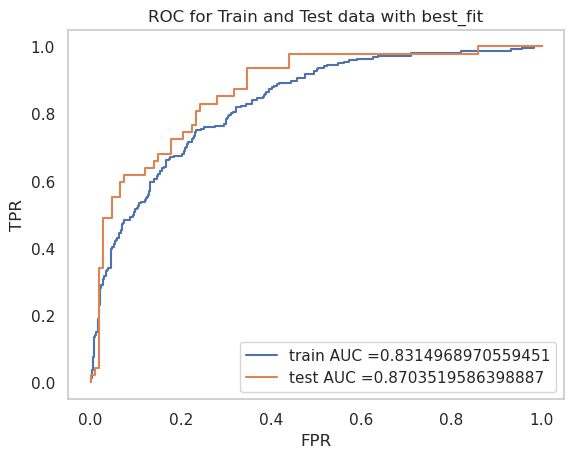

In [51]:
train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train, clf.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(x_test)[:,1])

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.show()

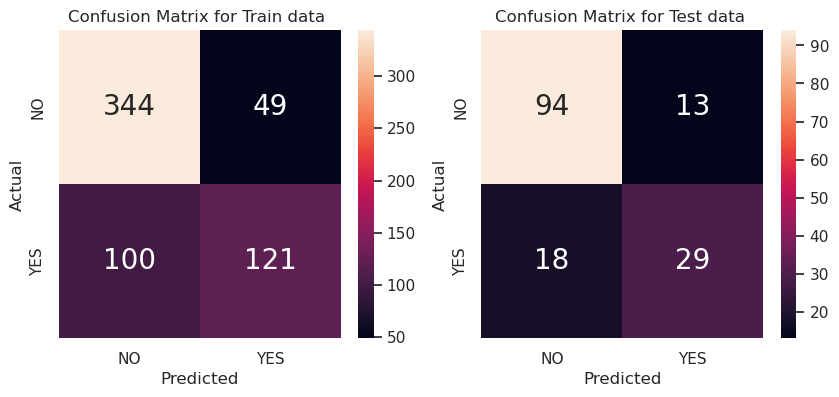

In [52]:
def plotcm (cm,ax,title):
    sns.heatmap(cm, ax=ax,annot=True,fmt='d',yticklabels=1,annot_kws={'size':20});
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.set_title('Confusion Matrix for {} '.format(title)); 
    ax.xaxis.set_ticklabels(['NO', 'YES']); 
    ax.yaxis.set_ticklabels(['NO', 'YES']);


fig, subplt = plt.subplots(1, 2,figsize=(10, 4)) 
cm = metrics.confusion_matrix(y_train, clf.predict(x_train))
ax = subplt[0]
plotcm(cm,ax,'Train data')

cm = metrics.confusion_matrix(y_test, clf.predict(x_test))
ax = subplt[1]
plotcm(cm,ax,'Test data')

In [53]:
feature_weights=sorted(zip(clf.coef_[0],cloumns_name),reverse = True)

In [54]:
feature_weights[:5]

[(0.9292828772636046, 'Glucose'),
 (0.6031650717311664, 'BMI'),
 (0.2758948056927195, 'Pregnancies'),
 (0.25996569581415363, 'DiabetesPedigreeFunction'),
 (0.23826746130232318, 'Age')]